In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
iris = load_iris()

In [25]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])

In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [43]:
# initialize and fit the model
clf = IsolationForest(contamination=0.1)
clf.fit(X_train)


IsolationForest(contamination=0.1)

In [55]:
# predict the anomalies in the data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[ 1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1  1  1]
[ 1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1 -1  1]


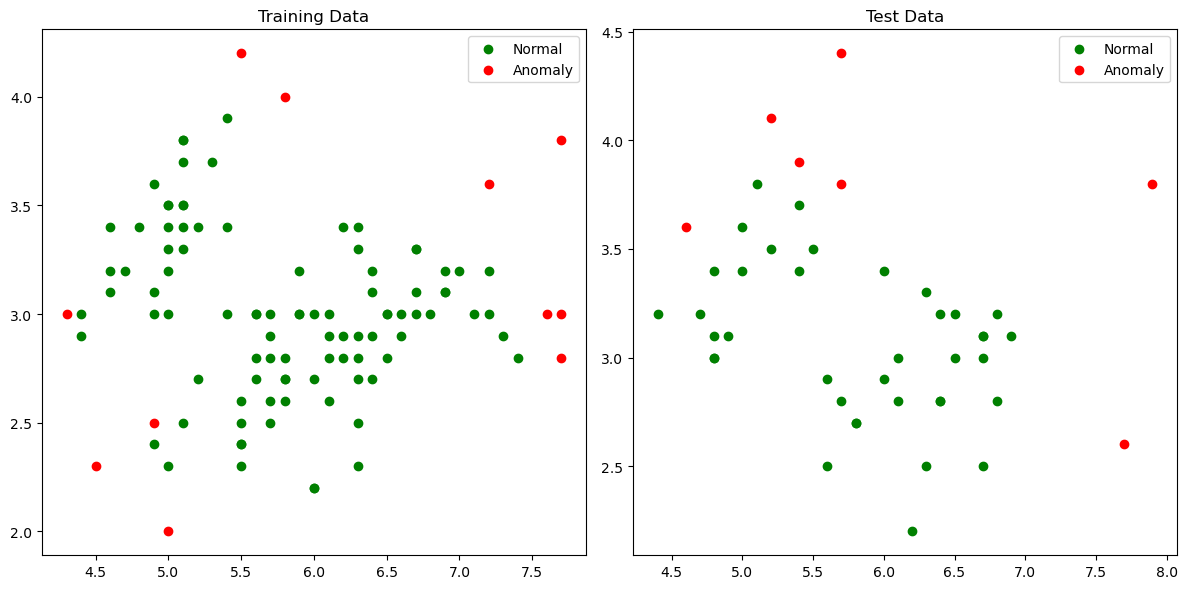

In [51]:
def create_scatter_plots(X1, y1, title1, X2, y2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Scatter plot for the first set of data
    axes[0].scatter(X1[y1==1, 0], X1[y1==1, 1], color='green', label='Normal')
    axes[0].scatter(X1[y1==-1, 0], X1[y1==-1, 1], color='red', label='Anomaly')
    axes[0].set_title(title1)
    axes[0].legend()

    # Scatter plot for the second set of data
    axes[1].scatter(X2[y2==1, 0], X2[y2==1, 1], color='green', label='Normal')
    axes[1].scatter(X2[y2==-1, 0], X2[y2==-1, 1], color='red', label='Anomaly')
    axes[1].set_title(title2)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# scatter plots
create_scatter_plots(X_train, y_pred_train, 'Training Data', X_test, y_pred_test, 'Test Data')


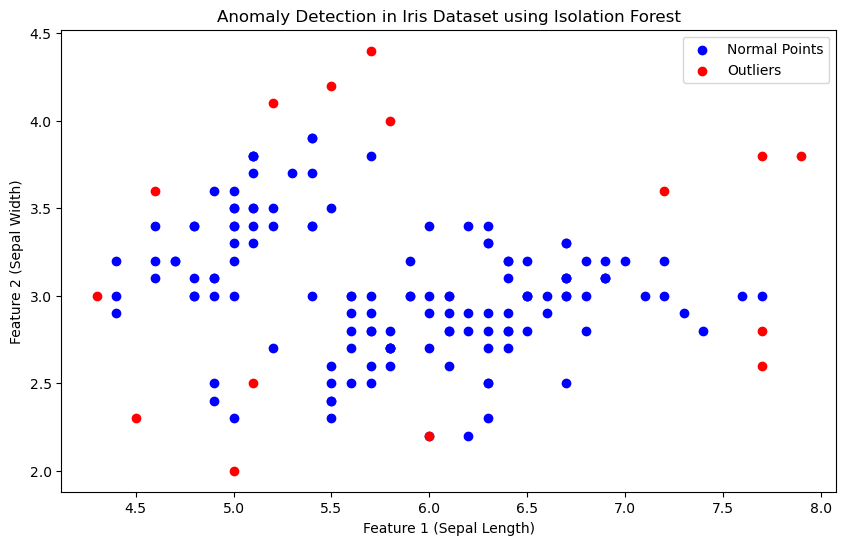

In [53]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create an Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)

# Fit the model on the dataset
y_pred = iso_forest.fit_predict(X)

# Convert prediction labels (-1: anomaly, 1: normal)
outliers = X[y_pred == -1]
normal_points = X[y_pred == 1]

# Plot the results (optional)
plt.figure(figsize=(10, 6))
plt.scatter(normal_points[:, 0], normal_points[:, 1], c='blue', label='Normal Points')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Outliers')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.legend()
plt.title('Anomaly Detection in Iris Dataset using Isolation Forest')
plt.show()
